## DAT Phase 1 Project 

**Student name: Ravinarayan Raghupathi, MSc PhD**

**Instructor name: Hardik Idnani**

In [1]:
# Import packages#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Overview
### Business Problem
Microsoft wants to launch a new movie studio and needs advice on the most profitable films and video content to create and distribute.
### The brief
Microsoft sees all the big companies creating original video content and have decided to create a new movie studio, but they don’t know anything about creating movies or video content. Explore what types of film/video content is currently doing the best at the box office, use exploratory data analysis and translate the findings into actionable insights that the Head of Microsoft's new studio can use to help decide what type of content to create.

### My strategy
    
I intend to examine the following key indicators in order to inform Microsoft about their best plan of action for creating movie content:
 
1. What are the average viewer ratings of movie genres?
    
2. What are the average worldwide profits by movie genre (taking into account production budgets)?
    
3. How profitable can it be to invest in setting up a video streaming platform?

### Step1:Create dataframes from the data files that I chose to analyse
Having analysed the .csv files provided in 'zippedData' (see RR_First draft.ipynb), I chose to use the following files to help me examine the key indicators described above: 'imdb.title.basics.csv', 'imdb.title.ratings.csv' and 'tn.movie_budgets.csv'. Additionally, I created a .csv file ('Streaming_revenue.csv') from readily available online data (https://headphonesaddict.com/video-streaming-statistics/) to show current and estimated revenues from video streaming platforms (in USD billions).

In [2]:
df1=pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
display(df1.head(), df1.shape)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


(146144, 6)

In [3]:
df2=pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
display(df2.head(), df2.shape)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


(73856, 3)

In [4]:
df3=pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
display(df3.head(), df3.shape)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


(5782, 6)

In [5]:
df4=pd.read_csv('./zippedData/Streaming_revenue.csv')
display(df4.head(),df4.shape,df4.dtypes)

,Year,Revenue
0,2018,38.56
1,2019,42.60
2,2020,61.00
3,2021,375.10
4,2022,444.30


(13, 2)

Year         int64
Revenue    float64
dtype: object

### Step2:Clean the dataframes

<p>
</p>
Here I remove unnecessary columns, check for NaN values and remove them if required, clean columns to display the correct numerical values and separate column data as required.

In [6]:
#Cleaning df1#

#Drop columns, split grouped Genres into individual ones, rename columns for later use#
df1.drop(columns=['original_title', 'start_year', 'runtime_minutes'],inplace=True)
df1=df1.assign(genres = df1.genres.str.split(",")).explode('genres')
df1.rename(columns={'primary_title': 'Title', 'genres': 'Genres'},inplace=True)
display (df1.head(), df1.dtypes)

,tconst,Title,Genres
0,tt0063540,Sunghursh,Action
0,tt0063540,Sunghursh,Crime
0,tt0063540,Sunghursh,Drama
1,tt0066787,One Day Before the Rainy Season,Biography
1,tt0066787,One Day Before the Rainy Season,Drama


tconst    object
Title     object
Genres    object
dtype: object

In [7]:
#Finding out how many unique genres are present in df1#
df1b=df1['Genres'].unique()
display (len(df1b), df1b)

28

array(['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy',
       'Horror', 'Thriller', 'Adventure', 'Animation', 'Documentary',
       'History', nan, 'Mystery', 'Sci-Fi', 'Romance', 'Family', 'War',
       'Music', 'Sport', 'Western', 'Musical', 'Adult', 'News',
       'Talk-Show', 'Reality-TV', 'Game-Show', 'Short'], dtype=object)

In [8]:
#Since there are Nan Values in Genres#
#checking for Nan values in all columns of df1#
display (df1['Genres'].isnull().values.any(),df1['tconst'].isnull().values.any(),df1['Title'].isnull().values.any())

True

False

False

In [9]:
#Removing Nan values from df1 Genres and checking to confirm they have been dropped#
df1.dropna(inplace=True)
df1.isnull().values.any()

False

In [10]:
#Checking how many unique genres are present in df1 now#
df1c=df1['Genres'].unique()
display (len(df1c), df1c)

27

array(['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy',
       'Horror', 'Thriller', 'Adventure', 'Animation', 'Documentary',
       'History', 'Mystery', 'Sci-Fi', 'Romance', 'Family', 'War',
       'Music', 'Sport', 'Western', 'Musical', 'Adult', 'News',
       'Talk-Show', 'Reality-TV', 'Game-Show', 'Short'], dtype=object)

In [11]:
#Cleaning df2#

#Drop and rename columns#
df2.drop(['numvotes'],inplace=True,axis=1)
df2.rename(columns={'averagerating': 'Rating'},inplace=True)
display (df2.head(), df2.dtypes)

,tconst,Rating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


tconst     object
Rating    float64
dtype: object

In [12]:
#Checking for Nan values in df2#
df2.isnull().values.any()

False

In [13]:
#Cleaning df3#

#Drop and rename columns#
df3.drop(['id','release_date','domestic_gross'],inplace=True, axis=1)
df3.rename(columns={'movie': 'Title'},inplace=True)

#Remove unnecessary string elements from money columns and convert string to int#
cols_to_clean = ['production_budget',  'worldwide_gross']
for col in cols_to_clean:
    df3[col] = df3[col].map(lambda x: x.replace('$',''))
    df3[col] = [x.replace(',', '') if ',' in x else x for x in df3[col]]
    df3[col] = df3[col].astype('int64')

#Creating new column for worldwide profit#
df3['Profit']= df3['worldwide_gross'] - df3['production_budget']

display (df3.head(), df3.dtypes)

,Title,production_budget,worldwide_gross,Profit
0,Avatar,425000000,2776345279,2351345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875
2,Dark Phoenix,350000000,149762350,-200237650
3,Avengers: Age of Ultron,330600000,1403013963,1072413963
4,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747


Title                object
production_budget     int64
worldwide_gross       int64
Profit                int64
dtype: object

In [14]:
#Checking for Nan values in df3#
df2.isnull().values.any()

False

### Step 3:Merge dataframes as required

<p>
</p>
Here I merge df1 and df2 to analyse Average Viewer Ratings by Genre, and merge df1 and df3 to analyse Worldwide Profits by Genre

In [15]:
#Merging dataframes df1 and df2 for analysis of Ratings by Genre#

Ratings = pd.merge(df1, df2, on ='tconst')
display (Ratings.head(10), Ratings.dtypes, Ratings.shape)

#Making sure there are no Nan values in merged dataframe#
Ratings.isnull().values.any()

,tconst,Title,Genres,Rating
0,tt0063540,Sunghursh,Action,7.0
1,tt0063540,Sunghursh,Crime,7.0
2,tt0063540,Sunghursh,Drama,7.0
3,tt0066787,One Day Before the Rainy Season,Biography,7.2
4,tt0066787,One Day Before the Rainy Season,Drama,7.2
5,tt0069049,The Other Side of the Wind,Drama,6.9
6,tt0069204,Sabse Bada Sukh,Comedy,6.1
7,tt0069204,Sabse Bada Sukh,Drama,6.1
8,tt0100275,The Wandering Soap Opera,Comedy,6.5
9,tt0100275,The Wandering Soap Opera,Drama,6.5


tconst     object
Title      object
Genres     object
Rating    float64
dtype: object

(128490, 4)

False

In [16]:
#Arranging new dataframe by average Rating by Genre#
Ratings=Ratings.groupby('Genres') ['Rating'].mean().reset_index()
Ratings.sort_values(by=['Rating'], ascending=[False], inplace=True)
display (Ratings, Ratings.dtypes, Ratings.shape)

,Genres,Rating
21,Short,8.800000
7,Documentary,7.332090
11,Game-Show,7.300000
17,News,7.271330
4,Biography,7.162274
14,Music,7.091972
12,History,7.040956
22,Sport,6.961493
24,War,6.584291
18,Reality-TV,6.500000


Genres     object
Rating    float64
dtype: object

(26, 2)

In [17]:
#Merging dataframes df1 and df3 for analysis of Profits by Genre#
Profits = pd.merge(df1, df3, on ='Title')
display (Profits.head(10), Profits.dtypes)

#Making sure there are no Nan values in merged dataframe#
Profits.isnull().values.any()

,tconst,Title,Genres,production_budget,worldwide_gross,Profit
0,tt0249516,Foodfight!,Action,45000000,73706,-44926294
1,tt0249516,Foodfight!,Animation,45000000,73706,-44926294
2,tt0249516,Foodfight!,Comedy,45000000,73706,-44926294
3,tt0293429,Mortal Kombat,Action,20000000,122133227,102133227
4,tt0293429,Mortal Kombat,Adventure,20000000,122133227,102133227
5,tt0293429,Mortal Kombat,Fantasy,20000000,122133227,102133227
6,tt0337692,On the Road,Adventure,25000000,9313302,-15686698
7,tt0337692,On the Road,Drama,25000000,9313302,-15686698
8,tt0337692,On the Road,Romance,25000000,9313302,-15686698
9,tt2404548,On the Road,Drama,25000000,9313302,-15686698


tconst               object
Title                object
Genres               object
production_budget     int64
worldwide_gross       int64
Profit                int64
dtype: object

False

In [18]:
#Arranging new dataframe by average Profit by Genre#
Profits=Profits.groupby('Genres') ['Profit'].mean().reset_index()
Profits.sort_values(by=['Profit'], ascending=[False], inplace=True)
#Display Profit in USD millions#
Profits['Profit']=Profits[('Profit')]/1000000
display (Profits, Profits.dtypes, Profits.shape)

,Genres,Profit
2,Animation,219.399378
1,Adventure,195.089851
13,Musical,182.732306
18,Sci-Fi,158.386000
9,Fantasy,149.960913
0,Action,114.082004
8,Family,108.895300
4,Comedy,69.276468
12,Music,49.540757
20,Thriller,49.338631


Genres     object
Profit    float64
dtype: object

(23, 2)

### Step 4:Data Visualisation

<p>
</p>
Using Matplotlib, I create some simple yet elegant bar graphs to visualise the relationships between Ratings and Genres, Profits and Genres, and finally the current and projected Revenues from video streaming services. I then export the images to the 'Images' folder that I had created, for use in my presentation.

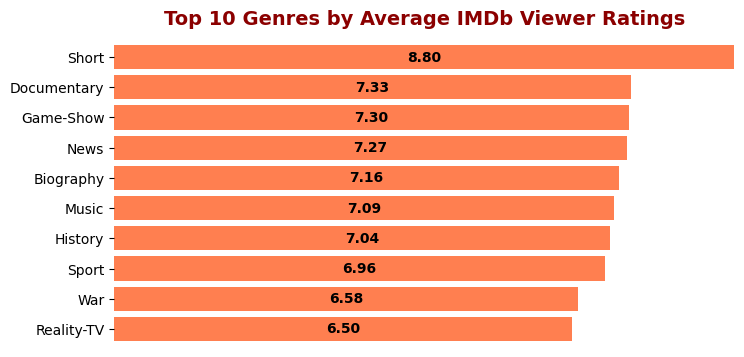

In [19]:
#Ratings by Genre#
genres=Ratings[('Genres')].head(10)
profits=Ratings[('Rating')].head(10)
fig, ax = plt.subplots(figsize =(8,4))
plot=plt.barh(genres, profits, color ='coral', height=0.8)
ax.invert_yaxis()
ax.spines[['top','right','left','bottom']].set_visible(False) 
ax.margins(x=0,y=0.02)
ax.bar_label(plot, color='black', fontsize=10, fontweight="bold",fmt='%.2f',label_type='center')
plt.title('Top 10 Genres by Average IMDb Viewer Ratings',y=1.02,loc ='center', color='darkred', fontsize=14, fontweight='bold')
ax.axes.get_xaxis().set_ticks([])
plt.savefig('Images/Viewer_Ratings.png',dpi=600,bbox_inches='tight')
plt.show()

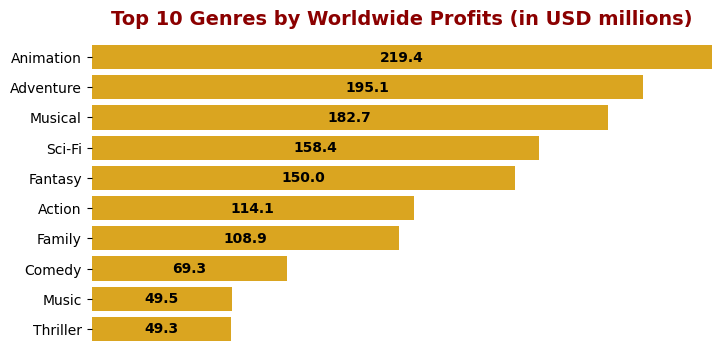

In [20]:
#Profit by Genre#
genres=Profits[('Genres')].head(10)
profits=Profits[('Profit')].head(10)
fig, ax = plt.subplots(figsize =(8,4))
plot=plt.barh(genres, profits, color ='goldenrod', height=0.8)
ax.invert_yaxis()
ax.spines[['top','right','left','bottom']].set_visible(False) 
ax.margins(x=0,y=0.02)
ax.bar_label(plot, color='black', fontsize=10, fmt='%.1f',label_type='center',fontweight="bold")
plt.title('Top 10 Genres by Worldwide Profits (in USD millions)',y=1.02,loc ='center', color='darkred', fontsize=14, fontweight='bold')
ax.axes.get_xaxis().set_ticks([])
plt.savefig('Images/Worldwide_profits.png',dpi=600,bbox_inches='tight')
plt.show()

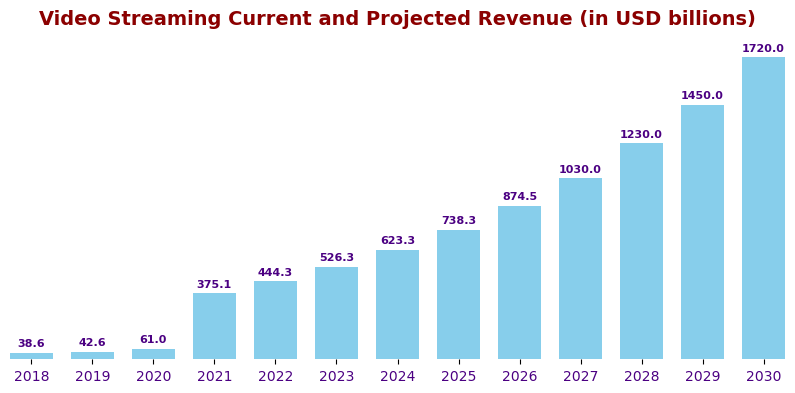

In [21]:
#Streaming Revene by Year#
year=df4[('Year')]
revenue=df4[('Revenue')]
fig, ax = plt.subplots(figsize =(10,4))
plot=plt.bar(year, revenue, color ='skyblue',width=0.7)
ax.spines[['top','right','left','bottom']].set_visible(False) 
ax.margins(x=0,y=0.02)
ax.bar_label(plot, color='indigo', fontsize=8, fmt='%.1f',label_type='edge',padding=3,fontweight='bold')
plt.title('Video Streaming Current and Projected Revenue (in USD billions)',y=1.06,loc ='center', color='darkred', fontsize=14, fontweight='bold')
plt.xticks(year, color='indigo')
ax.axes.get_yaxis().set_ticks([])
plt.savefig('Images/Streaming_revenues.png',dpi=600,bbox_inches='tight')
plt.show()

### Conclusions
#### Key Takeaways
1. The top 10 genres based on average IMDb viewer ratings do not necessarily reflect what is normally seen at the box office. That being said, they are all excellent categories for online video streaming.

2. The most profitable genres are what one would expect from popular culture.

3. Video streaming revenues show a healthy upward trend. 

#### Actionable Insights
Microsoft should:

1. Invest in producing box office movies in genres that are highly profitable, as evidenced from popular culture (e.g., Animation, Adventure, Musical, Science fiction, Fantasy and Action).
2. Seriously consider launching an online video streaming platform, given that worldwide revenues are expected to soar in the next 7 years.
3. Produce content in genres that are very popular amongst viewers for the streaming platform (e.g.,Shorts, Documentaries, Game Shows)